In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
import os
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path= os.getenv('HOME') + ('/aiffel/daton/data/train.csv')

In [3]:
train = pd.read_csv(train_path)

In [4]:
train.head()

,Unnamed: 0,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,gu
0,0,0,7622,서울,서울신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500.0,서울종로구
1,1,1,5399,서울,서울필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000.0,서울종로구
2,2,2,3578,서울,서울필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500.0,서울종로구
3,3,3,10957,서울,서울내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000.0,서울종로구
4,4,4,10639,서울,서울내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000.0,서울종로구


In [5]:
train_year = train.copy()
train_month = train.copy()

In [6]:
seoul = train.copy()
busan = train.copy()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1216553 non-null  int64  
 1   transaction_id          1216553 non-null  int64  
 2   apartment_id            1216553 non-null  int64  
 3   city                    1216553 non-null  object 
 4   dong                    1216553 non-null  object 
 5   jibun                   1216553 non-null  object 
 6   apt                     1216553 non-null  object 
 7   addr_kr                 1216553 non-null  object 
 8   exclusive_use_area      1216553 non-null  float64
 9   year_of_completion      1216553 non-null  int64  
 10  transaction_year_month  1216553 non-null  int64  
 11  transaction_date        1216553 non-null  object 
 12  floor                   1216553 non-null  int64  
 13  transaction_real_price  1216553 non-null  float64
 14  gu

In [8]:
train['transaction_year_month'] = train['transaction_year_month'].astype(str)

In [9]:
#  transaction_year_month를 4글자로 변환
train_year['transaction_year_month'] = train['transaction_year_month'].apply(lambda i:i[:-2])

In [10]:
#  transaction_year_month를 4글자로 변환
train_month['transaction_year_month'] = train['transaction_year_month'].apply(lambda i:i[2:])

In [11]:
seoul_year = train_year[train_year['city'] == '서울']
busan_year = train_year[train_year['city'] == '부산']

In [12]:
seoul_month = train_month[train_year['city'] == '서울']
busan_month = train_month[train_year['city'] == '부산']

## 연도 별 가격 변화 그래프

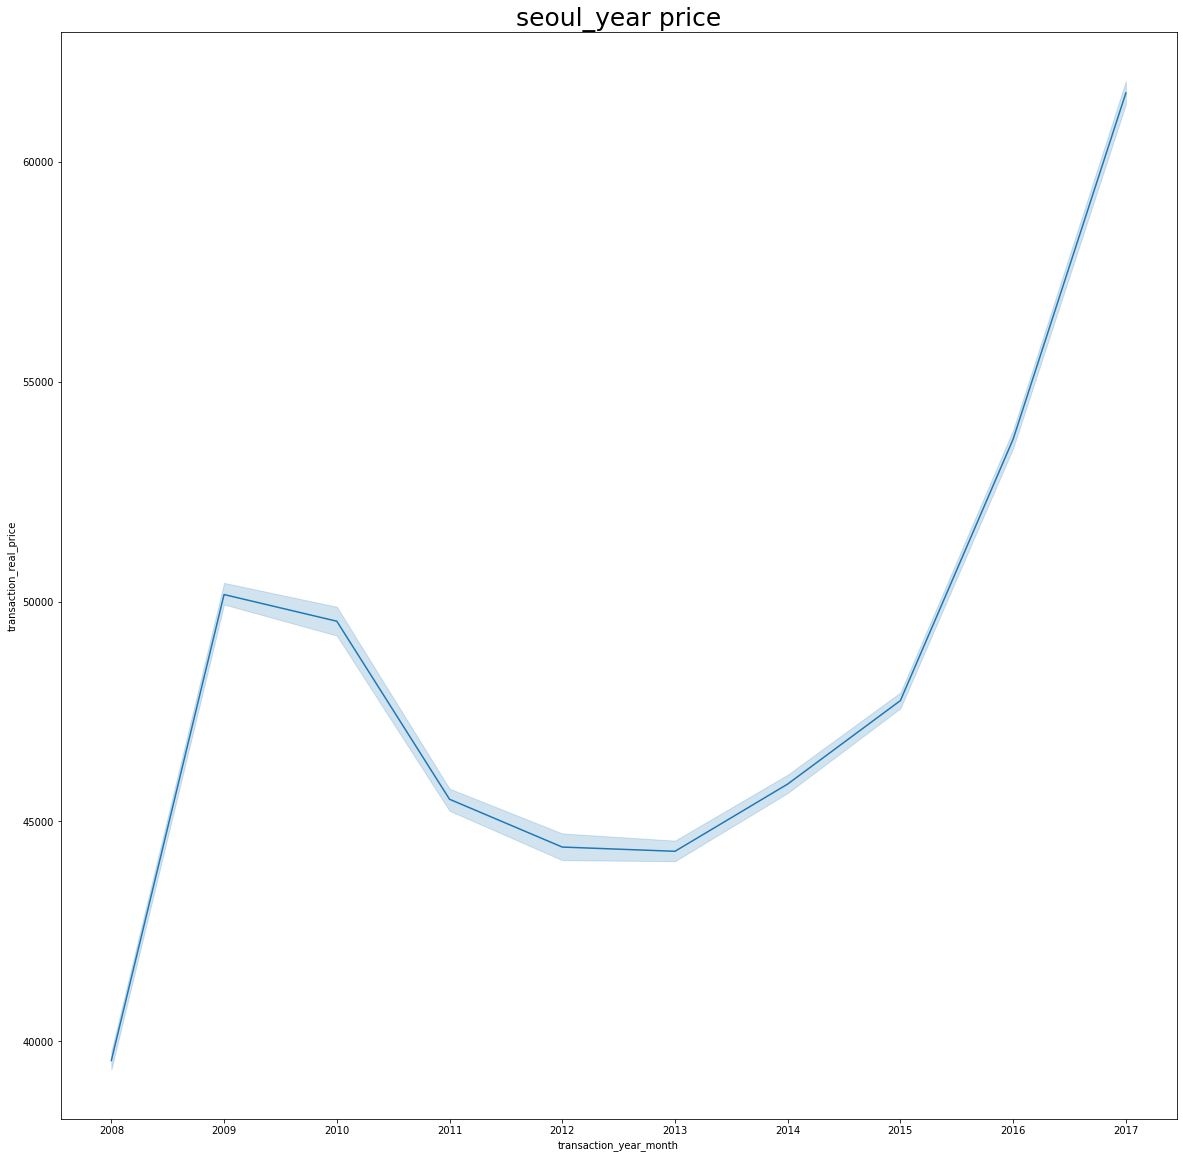

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = seoul_year, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('seoul_year price', fontsize=25)
plt.show()

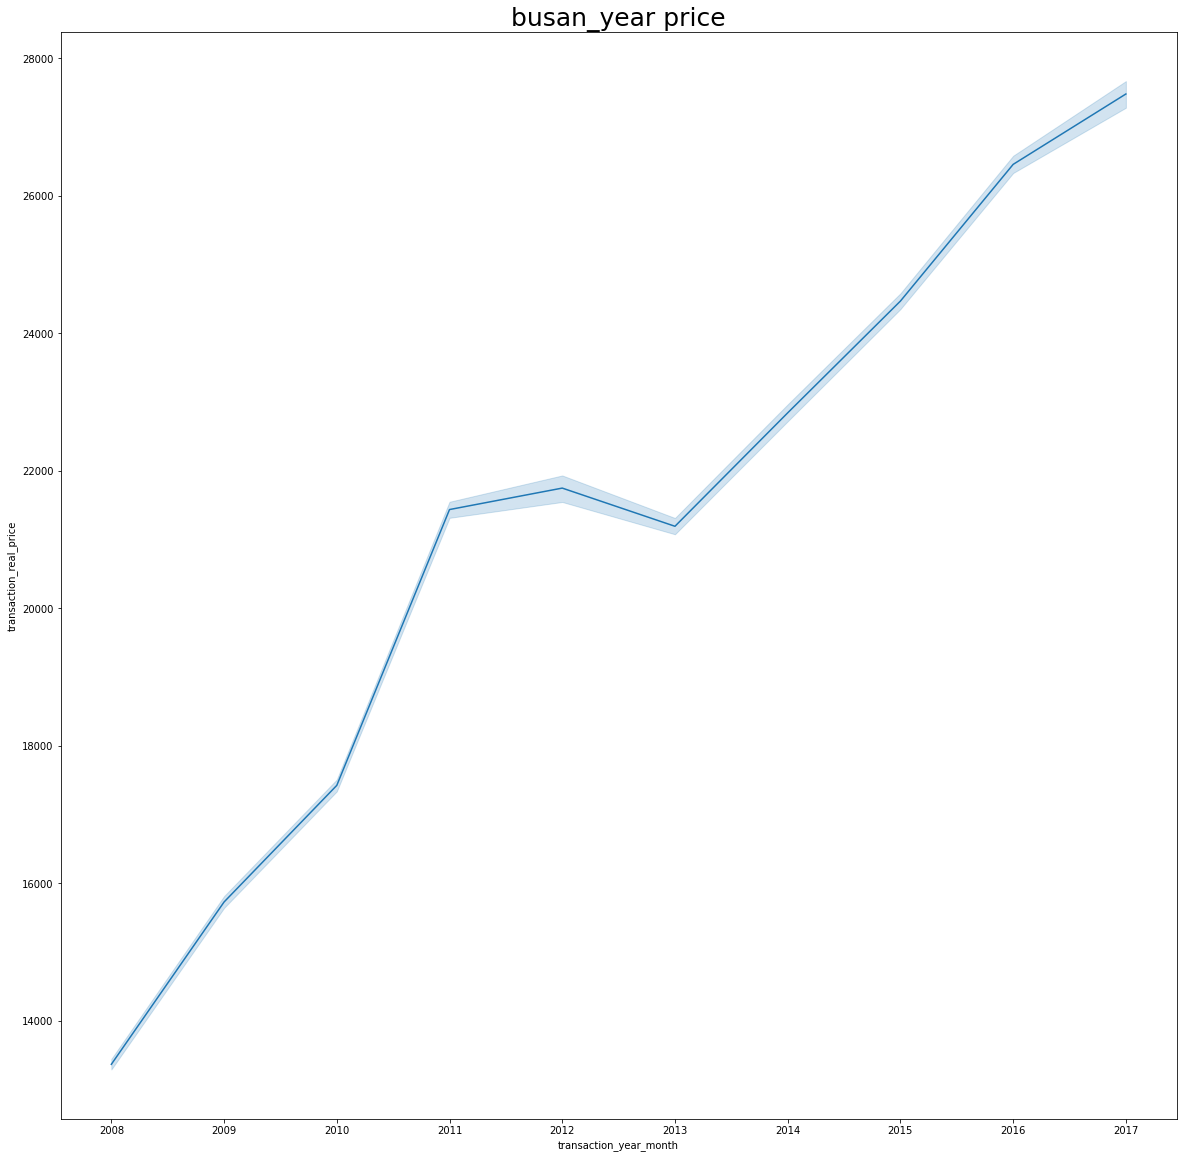

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = busan_year, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('busan_year price', fontsize=25)
plt.show()

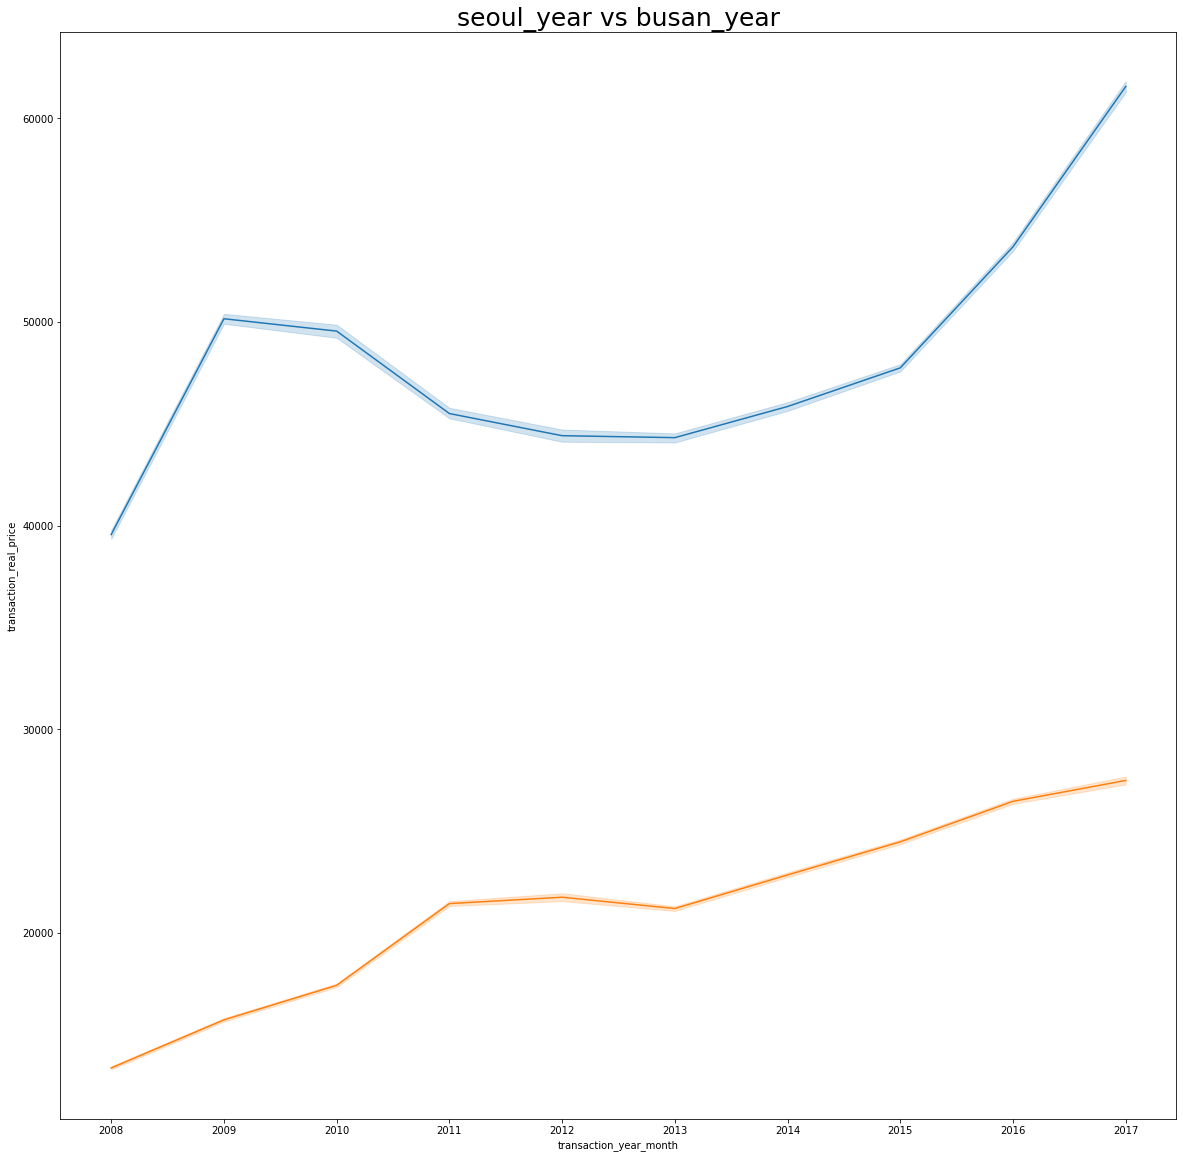

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = seoul_year, x = 'transaction_year_month', y = 'transaction_real_price')
sns.lineplot(data = busan_year, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('seoul_year vs busan_year', fontsize=25)
plt.show()

## 연도 간 월 별 가격 변화 그래프

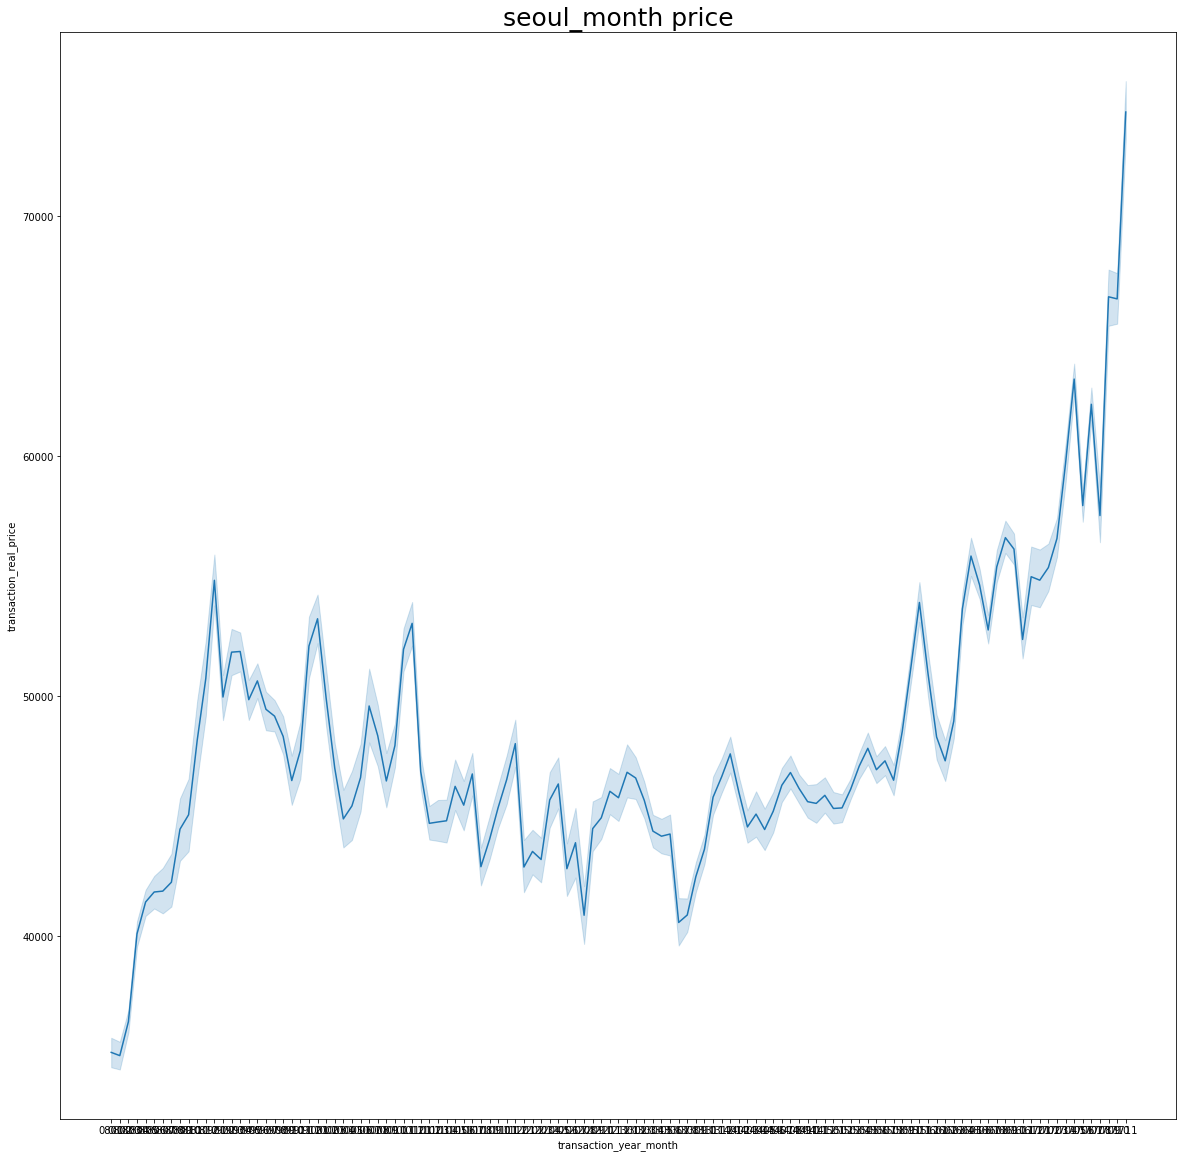

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = seoul_month, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('seoul_month price', fontsize=25)
plt.show()

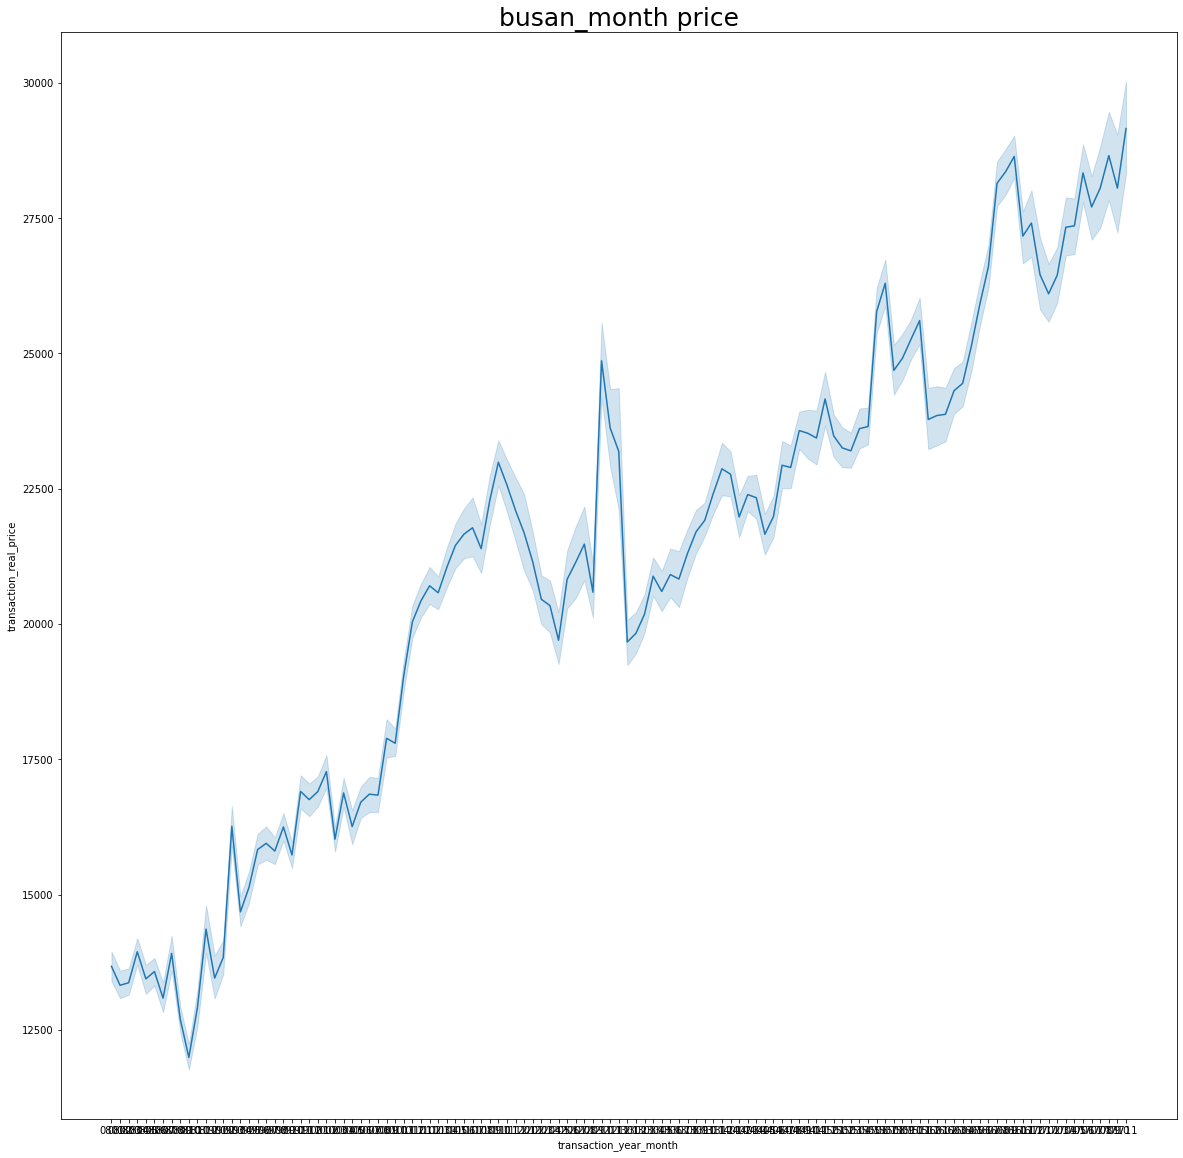

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = busan_month, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('busan_month price', fontsize=25)
plt.show()

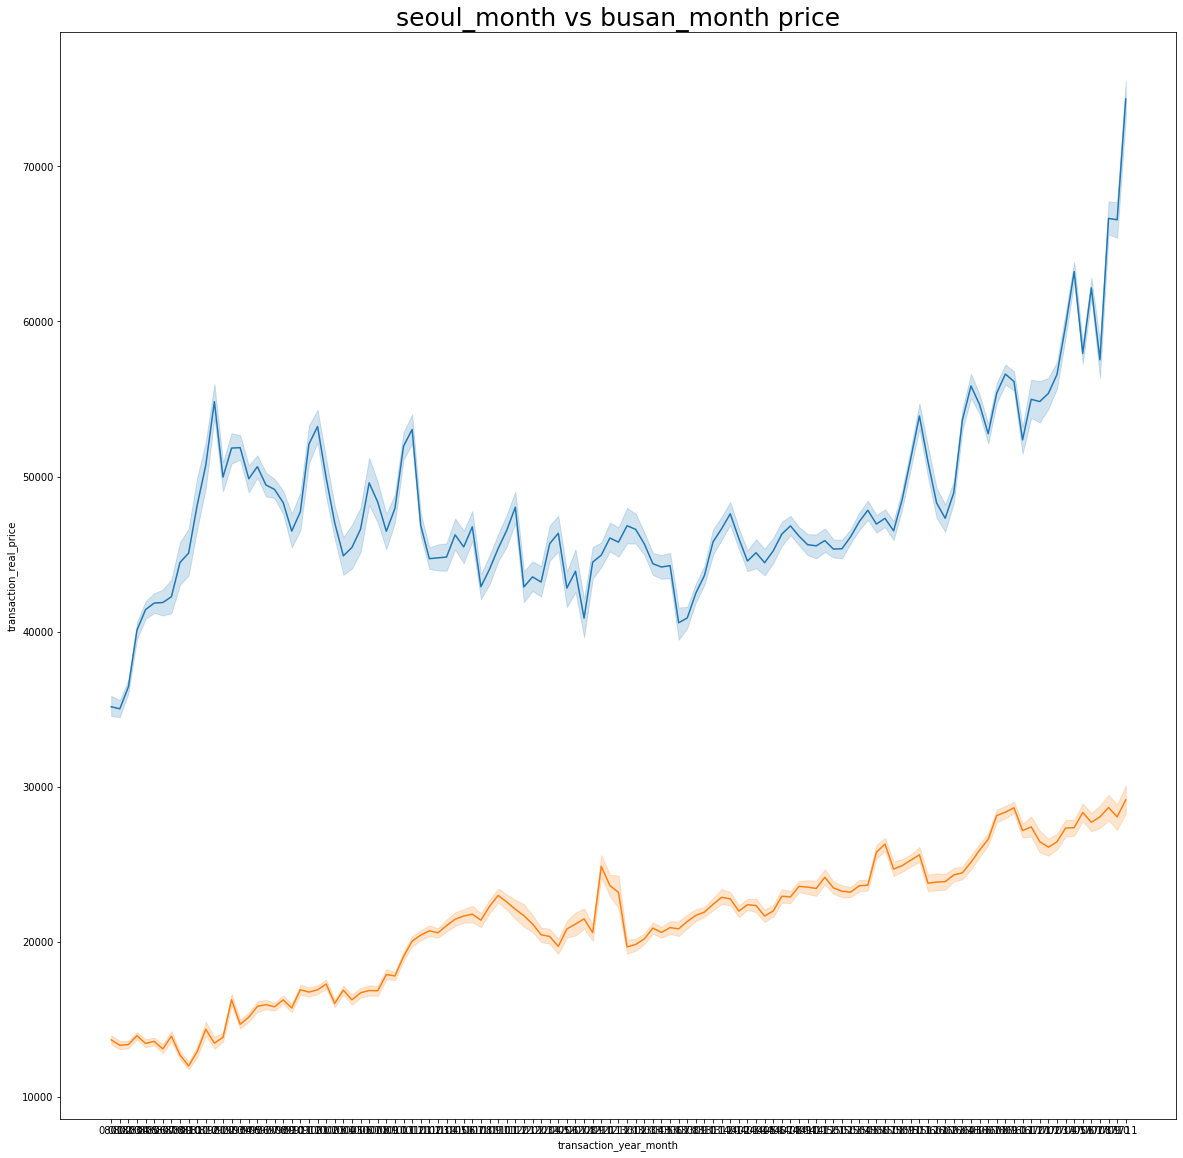

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = seoul_month, x = 'transaction_year_month', y = 'transaction_real_price')
sns.lineplot(data = busan_month, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('seoul_month vs busan_month price', fontsize=25)
plt.show()

## 월 별 변수로 나누기

In [ ]:
s_0801 = seoul_month.loc[seoul_month['transaction_year_month']== '0801']
s_0802 = seoul_month.loc[seoul_month['transaction_year_month']== '0802']
s_0803 = seoul_month.loc[seoul_month['transaction_year_month']== '0803']
s_0804 = seoul_month.loc[seoul_month['transaction_year_month']== '0804']
s_0805 = seoul_month.loc[seoul_month['transaction_year_month']== '0805']
s_0806 = seoul_month.loc[seoul_month['transaction_year_month']== '0806']
s_0807 = seoul_month.loc[seoul_month['transaction_year_month']== '0807']
s_0808 = seoul_month.loc[seoul_month['transaction_year_month']== '0808']
s_0809 = seoul_month.loc[seoul_month['transaction_year_month']== '0809']
s_0810 = seoul_month.loc[seoul_month['transaction_year_month']== '0810']
s_0811 = seoul_month.loc[seoul_month['transaction_year_month']== '0811']
s_0812 = seoul_month.loc[seoul_month['transaction_year_month']== '0812']

s_month_08 = pd.concat([s_0801, s_0802, s_0803,s_0804, s_0805, s_0806, s_0807, s_0808, s_0809, s_0810, s_0811, s_0812] ,axis = 0)

s_0901 = seoul_month.loc[seoul_month['transaction_year_month']== '0901']
s_0902 = seoul_month.loc[seoul_month['transaction_year_month']== '0902']
s_0903 = seoul_month.loc[seoul_month['transaction_year_month']== '0903']
s_0904 = seoul_month.loc[seoul_month['transaction_year_month']== '0904']
s_0905 = seoul_month.loc[seoul_month['transaction_year_month']== '0905']
s_0906 = seoul_month.loc[seoul_month['transaction_year_month']== '0906']
s_0907 = seoul_month.loc[seoul_month['transaction_year_month']== '0907']
s_0908 = seoul_month.loc[seoul_month['transaction_year_month']== '0908']
s_0909 = seoul_month.loc[seoul_month['transaction_year_month']== '0909']
s_0910 = seoul_month.loc[seoul_month['transaction_year_month']== '0910']
s_0911 = seoul_month.loc[seoul_month['transaction_year_month']== '0911']
s_0912 = seoul_month.loc[seoul_month['transaction_year_month']== '0912']

s_month_09 = pd.concat([s_0901, s_0902, s_0903, s_0904, s_0905, s_0906, s_0907, s_0908, s_0909, s_0910, s_0911, s_0912] ,axis = 0)

s_1001 = seoul_month.loc[seoul_month['transaction_year_month']== '1001']
s_1002 = seoul_month.loc[seoul_month['transaction_year_month']== '1002']
s_1003 = seoul_month.loc[seoul_month['transaction_year_month']== '1003']
s_1004 = seoul_month.loc[seoul_month['transaction_year_month']== '1004']
s_1005 = seoul_month.loc[seoul_month['transaction_year_month']== '1005']
s_1006 = seoul_month.loc[seoul_month['transaction_year_month']== '1006']
s_1007 = seoul_month.loc[seoul_month['transaction_year_month']== '1007']
s_1008 = seoul_month.loc[seoul_month['transaction_year_month']== '1008']
s_1009 = seoul_month.loc[seoul_month['transaction_year_month']== '1009']
s_1010 = seoul_month.loc[seoul_month['transaction_year_month']== '1010']
s_1011 = seoul_month.loc[seoul_month['transaction_year_month']== '1011']
s_1012 = seoul_month.loc[seoul_month['transaction_year_month']== '1012']

s_month_10 = pd.concat([s_1001, s_1002, s_1003,s_1004, s_1005, s_1006, s_1007, s_1008, s_1009, s_1010, s_1011, s_1012] ,axis = 0)

s_1101 = seoul_month.loc[seoul_month['transaction_year_month']== '1101']
s_1102 = seoul_month.loc[seoul_month['transaction_year_month']== '1102']
s_1103 = seoul_month.loc[seoul_month['transaction_year_month']== '1103']
s_1104 = seoul_month.loc[seoul_month['transaction_year_month']== '1104']
s_1105 = seoul_month.loc[seoul_month['transaction_year_month']== '1105']
s_1106 = seoul_month.loc[seoul_month['transaction_year_month']== '1106']
s_1107 = seoul_month.loc[seoul_month['transaction_year_month']== '1107']
s_1108 = seoul_month.loc[seoul_month['transaction_year_month']== '1108']
s_1109 = seoul_month.loc[seoul_month['transaction_year_month']== '1109']
s_1110 = seoul_month.loc[seoul_month['transaction_year_month']== '1110']
s_1111 = seoul_month.loc[seoul_month['transaction_year_month']== '1111']
s_1112 = seoul_month.loc[seoul_month['transaction_year_month']== '1112']

s_month_11 = pd.concat([s_1101, s_1102, s_1103,s_1104, s_1105, s_1106, s_1107, s_1108, s_1109, s_1110, s_1111, s_1112] ,axis = 0)

s_1201 = seoul_month.loc[seoul_month['transaction_year_month']== '1201']
s_1202 = seoul_month.loc[seoul_month['transaction_year_month']== '1202']
s_1203 = seoul_month.loc[seoul_month['transaction_year_month']== '1203']
s_1204 = seoul_month.loc[seoul_month['transaction_year_month']== '1204']
s_1205 = seoul_month.loc[seoul_month['transaction_year_month']== '1205']
s_1206 = seoul_month.loc[seoul_month['transaction_year_month']== '1206']
s_1207 = seoul_month.loc[seoul_month['transaction_year_month']== '1207']
s_1208 = seoul_month.loc[seoul_month['transaction_year_month']== '1208']
s_1209 = seoul_month.loc[seoul_month['transaction_year_month']== '1209']
s_1210 = seoul_month.loc[seoul_month['transaction_year_month']== '1210']
s_1211 = seoul_month.loc[seoul_month['transaction_year_month']== '1211']
s_1212 = seoul_month.loc[seoul_month['transaction_year_month']== '1212']

s_month_12 = pd.concat([s_1201, s_1202, s_1203,s_1204, s_1205, s_1206, s_1207, s_1208, s_1209, s_1210, s_1211, s_1212] ,axis = 0)



In [ ]:
s_1301 = seoul_month.loc[seoul_month['transaction_year_month']== '1301']
s_1302 = seoul_month.loc[seoul_month['transaction_year_month']== '1302']
s_1303 = seoul_month.loc[seoul_month['transaction_year_month']== '1303']
s_1304 = seoul_month.loc[seoul_month['transaction_year_month']== '1304']
s_1305 = seoul_month.loc[seoul_month['transaction_year_month']== '1305']
s_1306 = seoul_month.loc[seoul_month['transaction_year_month']== '1306']
s_1307 = seoul_month.loc[seoul_month['transaction_year_month']== '1307']
s_1308 = seoul_month.loc[seoul_month['transaction_year_month']== '1308']
s_1309 = seoul_month.loc[seoul_month['transaction_year_month']== '1309']
s_1310 = seoul_month.loc[seoul_month['transaction_year_month']== '1310']
s_1311 = seoul_month.loc[seoul_month['transaction_year_month']== '1311']
s_1312 = seoul_month.loc[seoul_month['transaction_year_month']== '1312']

s_month_13 = pd.concat([s_1301, s_1302, s_1303,s_1304, s_1305, s_1306, s_1307, s_1308, s_1309, s_1310, s_1311, s_1312] ,axis = 0)

s_1401 = seoul_month.loc[seoul_month['transaction_year_month']== '1401']
s_1402 = seoul_month.loc[seoul_month['transaction_year_month']== '1402']
s_1403 = seoul_month.loc[seoul_month['transaction_year_month']== '1403']
s_1404 = seoul_month.loc[seoul_month['transaction_year_month']== '1404']
s_1405 = seoul_month.loc[seoul_month['transaction_year_month']== '1405']
s_1406 = seoul_month.loc[seoul_month['transaction_year_month']== '1406']
s_1407 = seoul_month.loc[seoul_month['transaction_year_month']== '1407']
s_1408 = seoul_month.loc[seoul_month['transaction_year_month']== '1408']
s_1409 = seoul_month.loc[seoul_month['transaction_year_month']== '1409']
s_1410 = seoul_month.loc[seoul_month['transaction_year_month']== '1410']
s_1411 = seoul_month.loc[seoul_month['transaction_year_month']== '1411']
s_1412 = seoul_month.loc[seoul_month['transaction_year_month']== '1412']

s_month_14 = pd.concat([s_1401, s_1402, s_1403,s_1404, s_1405, s_1406, s_1407, s_1408, s_1409, s_1410, s_1411, s_1412] ,axis = 0)

s_1501 = seoul_month.loc[seoul_month['transaction_year_month']== '1501']
s_1502 = seoul_month.loc[seoul_month['transaction_year_month']== '1502']
s_1503 = seoul_month.loc[seoul_month['transaction_year_month']== '1503']
s_1504 = seoul_month.loc[seoul_month['transaction_year_month']== '1504']
s_1505 = seoul_month.loc[seoul_month['transaction_year_month']== '1505']
s_1506 = seoul_month.loc[seoul_month['transaction_year_month']== '1506']
s_1507 = seoul_month.loc[seoul_month['transaction_year_month']== '1507']
s_1508 = seoul_month.loc[seoul_month['transaction_year_month']== '1508']
s_1509 = seoul_month.loc[seoul_month['transaction_year_month']== '1509']
s_1510 = seoul_month.loc[seoul_month['transaction_year_month']== '1510']
s_1511 = seoul_month.loc[seoul_month['transaction_year_month']== '1511']
s_1512 = seoul_month.loc[seoul_month['transaction_year_month']== '1512']

s_month_15 = pd.concat([s_1501, s_1502, s_1503, s_1504, s_1505, s_1506, s_1507, s_1508, s_1509, s_1510, s_1511, s_1512] ,axis = 0)

s_1601 = seoul_month.loc[seoul_month['transaction_year_month']== '1601']
s_1602 = seoul_month.loc[seoul_month['transaction_year_month']== '1602']
s_1603 = seoul_month.loc[seoul_month['transaction_year_month']== '1603']
s_1604 = seoul_month.loc[seoul_month['transaction_year_month']== '1604']
s_1605 = seoul_month.loc[seoul_month['transaction_year_month']== '1605']
s_1606 = seoul_month.loc[seoul_month['transaction_year_month']== '1606']
s_1607 = seoul_month.loc[seoul_month['transaction_year_month']== '1607']
s_1608 = seoul_month.loc[seoul_month['transaction_year_month']== '1608']
s_1609 = seoul_month.loc[seoul_month['transaction_year_month']== '1609']
s_1610 = seoul_month.loc[seoul_month['transaction_year_month']== '1610']
s_1611 = seoul_month.loc[seoul_month['transaction_year_month']== '1611']
s_1612 = seoul_month.loc[seoul_month['transaction_year_month']== '1612']

s_month_16 = pd.concat([s_1601, s_1602, s_1603,s_1604, s_1605, s_1606, s_1607, s_1608, s_1609, s_1610, s_1611, s_1612] ,axis = 0)

s_1701 = seoul_month.loc[seoul_month['transaction_year_month']== '1701']
s_1702 = seoul_month.loc[seoul_month['transaction_year_month']== '1702']
s_1703 = seoul_month.loc[seoul_month['transaction_year_month']== '1703']
s_1704 = seoul_month.loc[seoul_month['transaction_year_month']== '1704']
s_1705 = seoul_month.loc[seoul_month['transaction_year_month']== '1705']
s_1706 = seoul_month.loc[seoul_month['transaction_year_month']== '1706']
s_1707 = seoul_month.loc[seoul_month['transaction_year_month']== '1707']
s_1708 = seoul_month.loc[seoul_month['transaction_year_month']== '1708']
s_1709 = seoul_month.loc[seoul_month['transaction_year_month']== '1709']
s_1710 = seoul_month.loc[seoul_month['transaction_year_month']== '1710']
s_1711 = seoul_month.loc[seoul_month['transaction_year_month']== '1711']
s_1712 = seoul_month.loc[seoul_month['transaction_year_month']== '1712']

s_month_17 = pd.concat([s_1701, s_1702, s_1703,s_1704, s_1705, s_1706, s_1707, s_1708, s_1709, s_1710, s_1711, s_1712] ,axis = 0)

In [ ]:
b_0801 = busan_month.loc[busan_month['transaction_year_month']== '0801']
b_0802 = busan_month.loc[busan_month['transaction_year_month']== '0802']
b_0803 = busan_month.loc[busan_month['transaction_year_month']== '0803']
b_0804 = busan_month.loc[busan_month['transaction_year_month']== '0804']
b_0805 = busan_month.loc[busan_month['transaction_year_month']== '0805']
b_0806 = busan_month.loc[busan_month['transaction_year_month']== '0806']
b_0807 = busan_month.loc[busan_month['transaction_year_month']== '0807']
b_0808 = busan_month.loc[busan_month['transaction_year_month']== '0808']
b_0809 = busan_month.loc[busan_month['transaction_year_month']== '0809']
b_0810 = busan_month.loc[busan_month['transaction_year_month']== '0810']
b_0811 = busan_month.loc[busan_month['transaction_year_month']== '0811']
b_0812 = busan_month.loc[busan_month['transaction_year_month']== '0812']

b_month_08 = pd.concat([b_0801, b_0802, b_0803, b_0804, b_0805, b_0806, b_0807, b_0808, b_0809, b_0810, b_0811, b_0812] ,axis = 0)

b_0901 = busan_month.loc[busan_month['transaction_year_month']== '0901']
b_0902 = busan_month.loc[busan_month['transaction_year_month']== '0902']
b_0903 = busan_month.loc[busan_month['transaction_year_month']== '0903']
b_0904 = busan_month.loc[busan_month['transaction_year_month']== '0904']
b_0905 = busan_month.loc[busan_month['transaction_year_month']== '0905']
b_0906 = busan_month.loc[busan_month['transaction_year_month']== '0906']
b_0907 = busan_month.loc[busan_month['transaction_year_month']== '0907']
b_0908 = busan_month.loc[busan_month['transaction_year_month']== '0908']
b_0909 = busan_month.loc[busan_month['transaction_year_month']== '0909']
b_0910 = busan_month.loc[busan_month['transaction_year_month']== '0910']
b_0911 = busan_month.loc[busan_month['transaction_year_month']== '0911']
b_0912 = busan_month.loc[busan_month['transaction_year_month']== '0912']

b_month_09 = pd.concat([b_0901, b_0902, b_0903, b_0904, b_0905, b_0906, b_0907, b_0908, b_0909, b_0910, b_0911, b_0912] ,axis = 0)

b_1001 = busan_month.loc[busan_month['transaction_year_month']== '1001']
b_1002 = busan_month.loc[busan_month['transaction_year_month']== '1002']
b_1003 = busan_month.loc[busan_month['transaction_year_month']== '1003']
b_1004 = busan_month.loc[busan_month['transaction_year_month']== '1004']
b_1005 = busan_month.loc[busan_month['transaction_year_month']== '1005']
b_1006 = busan_month.loc[busan_month['transaction_year_month']== '1006']
b_1007 = busan_month.loc[busan_month['transaction_year_month']== '1007']
b_1008 = busan_month.loc[busan_month['transaction_year_month']== '1008']
b_1009 = busan_month.loc[busan_month['transaction_year_month']== '1009']
b_1010 = busan_month.loc[busan_month['transaction_year_month']== '1010']
b_1011 = busan_month.loc[busan_month['transaction_year_month']== '1011']
b_1012 = busan_month.loc[busan_month['transaction_year_month']== '1012']

b_month_10 = pd.concat([b_1001, b_1002, b_1003,b_1004, b_1005, b_1006, b_1007, b_1008, b_1009, b_1010, b_1011, b_1012] ,axis = 0)

b_1101 = busan_month.loc[busan_month['transaction_year_month']== '1101']
b_1102 = busan_month.loc[busan_month['transaction_year_month']== '1102']
b_1103 = busan_month.loc[busan_month['transaction_year_month']== '1103']
b_1104 = busan_month.loc[busan_month['transaction_year_month']== '1104']
b_1105 = busan_month.loc[busan_month['transaction_year_month']== '1105']
b_1106 = busan_month.loc[busan_month['transaction_year_month']== '1106']
b_1107 = busan_month.loc[busan_month['transaction_year_month']== '1107']
b_1108 = busan_month.loc[busan_month['transaction_year_month']== '1108']
b_1109 = busan_month.loc[busan_month['transaction_year_month']== '1109']
b_1110 = busan_month.loc[busan_month['transaction_year_month']== '1110']
b_1111 = busan_month.loc[busan_month['transaction_year_month']== '1111']
b_1112 = busan_month.loc[busan_month['transaction_year_month']== '1112']

b_month_11 = pd.concat([b_1101, b_1102, b_1103,b_1104, b_1105, b_1106, b_1107, b_1108, b_1109, b_1110, b_1111, b_1112] ,axis = 0)


In [ ]:
b_1201 = busan_month.loc[busan_month['transaction_year_month']== '1201']
b_1202 = busan_month.loc[busan_month['transaction_year_month']== '1202']
b_1203 = busan_month.loc[busan_month['transaction_year_month']== '1203']
b_1204 = busan_month.loc[busan_month['transaction_year_month']== '1204']
b_1205 = busan_month.loc[busan_month['transaction_year_month']== '1205']
b_1206 = busan_month.loc[busan_month['transaction_year_month']== '1206']
b_1207 = busan_month.loc[busan_month['transaction_year_month']== '1207']
b_1208 = busan_month.loc[busan_month['transaction_year_month']== '1208']
b_1209 = busan_month.loc[busan_month['transaction_year_month']== '1209']
b_1210 = busan_month.loc[busan_month['transaction_year_month']== '1210']
b_1211 = busan_month.loc[busan_month['transaction_year_month']== '1211']
b_1212 = busan_month.loc[busan_month['transaction_year_month']== '1212']

b_month_12 = pd.concat([b_1201, b_1202, b_1203, b_1204, b_1205, b_1206, b_1207, b_1208, b_1209, b_1210, b_1211, b_1212] ,axis = 0)

b_1301 = busan_month.loc[busan_month['transaction_year_month']== '1301']
b_1302 = busan_month.loc[busan_month['transaction_year_month']== '1302']
b_1303 = busan_month.loc[busan_month['transaction_year_month']== '1303']
b_1304 = busan_month.loc[busan_month['transaction_year_month']== '1304']
b_1305 = busan_month.loc[busan_month['transaction_year_month']== '1305']
b_1306 = busan_month.loc[busan_month['transaction_year_month']== '1306']
b_1307 = busan_month.loc[busan_month['transaction_year_month']== '1307']
b_1308 = busan_month.loc[busan_month['transaction_year_month']== '1308']
b_1309 = busan_month.loc[busan_month['transaction_year_month']== '1309']
b_1310 = busan_month.loc[busan_month['transaction_year_month']== '1310']
b_1311 = busan_month.loc[busan_month['transaction_year_month']== '1311']
b_1312 = busan_month.loc[busan_month['transaction_year_month']== '1312']

b_month_13 = pd.concat([b_1301, b_1302, b_1303,b_1304, b_1305, b_1306, b_1307, b_1308, b_1309, b_1310, b_1311, b_1312] ,axis = 0)

b_1401 = busan_month.loc[busan_month['transaction_year_month']== '1401']
b_1402 = busan_month.loc[busan_month['transaction_year_month']== '1402']
b_1403 = busan_month.loc[busan_month['transaction_year_month']== '1403']
b_1404 = busan_month.loc[busan_month['transaction_year_month']== '1404']
b_1405 = busan_month.loc[busan_month['transaction_year_month']== '1405']
b_1406 = busan_month.loc[busan_month['transaction_year_month']== '1406']
b_1407 = busan_month.loc[busan_month['transaction_year_month']== '1407']
b_1408 = busan_month.loc[busan_month['transaction_year_month']== '1408']
b_1409 = busan_month.loc[busan_month['transaction_year_month']== '1409']
b_1410 = busan_month.loc[busan_month['transaction_year_month']== '1410']
b_1411 = busan_month.loc[busan_month['transaction_year_month']== '1411']
b_1412 = busan_month.loc[busan_month['transaction_year_month']== '1412']

b_month_14 = pd.concat([b_1401, b_1402, b_1403, b_1404, b_1405, b_1406, b_1407, b_1408, b_1409, b_1410, b_1411, b_1412] ,axis = 0)

b_1501 = busan_month.loc[busan_month['transaction_year_month']== '1501']
b_1502 = busan_month.loc[busan_month['transaction_year_month']== '1502']
b_1503 = busan_month.loc[busan_month['transaction_year_month']== '1503']
b_1504 = busan_month.loc[busan_month['transaction_year_month']== '1504']
b_1505 = busan_month.loc[busan_month['transaction_year_month']== '1505']
b_1506 = busan_month.loc[busan_month['transaction_year_month']== '1506']
b_1507 = busan_month.loc[busan_month['transaction_year_month']== '1507']
b_1508 = busan_month.loc[busan_month['transaction_year_month']== '1508']
b_1509 = busan_month.loc[busan_month['transaction_year_month']== '1509']
b_1510 = busan_month.loc[busan_month['transaction_year_month']== '1510']
b_1511 = busan_month.loc[busan_month['transaction_year_month']== '1511']
b_1512 = busan_month.loc[busan_month['transaction_year_month']== '1512']

b_month_15 = pd.concat([b_1501, b_1502, b_1503, b_1504, b_1505, b_1506, b_1507, b_1508, b_1509, b_1510, b_1511, b_1512] ,axis = 0)

b_1601 = busan_month.loc[busan_month['transaction_year_month']== '1601']
b_1602 = busan_month.loc[busan_month['transaction_year_month']== '1602']
b_1603 = busan_month.loc[busan_month['transaction_year_month']== '1603']
b_1604 = busan_month.loc[busan_month['transaction_year_month']== '1604']
b_1605 = busan_month.loc[busan_month['transaction_year_month']== '1605']
b_1606 = busan_month.loc[busan_month['transaction_year_month']== '1606']
b_1607 = busan_month.loc[busan_month['transaction_year_month']== '1607']
b_1608 = busan_month.loc[busan_month['transaction_year_month']== '1608']
b_1609 = busan_month.loc[busan_month['transaction_year_month']== '1609']
b_1610 = busan_month.loc[busan_month['transaction_year_month']== '1610']
b_1611 = busan_month.loc[busan_month['transaction_year_month']== '1611']
b_1612 = busan_month.loc[busan_month['transaction_year_month']== '1612']

b_month_16 = pd.concat([b_1601, b_1602, b_1603, b_1604, b_1605, b_1606, b_1607, b_1608, b_1609, b_1610, b_1611, b_1612] ,axis = 0)

b_1701 = busan_month.loc[busan_month['transaction_year_month']== '1701']
b_1702 = busan_month.loc[busan_month['transaction_year_month']== '1702']
b_1703 = busan_month.loc[busan_month['transaction_year_month']== '1703']
b_1704 = busan_month.loc[busan_month['transaction_year_month']== '1704']
b_1705 = busan_month.loc[busan_month['transaction_year_month']== '1705']
b_1706 = busan_month.loc[busan_month['transaction_year_month']== '1706']
b_1707 = busan_month.loc[busan_month['transaction_year_month']== '1707']
b_1708 = busan_month.loc[busan_month['transaction_year_month']== '1708']
b_1709 = busan_month.loc[busan_month['transaction_year_month']== '1709']
b_1710 = busan_month.loc[busan_month['transaction_year_month']== '1710']
b_1711 = busan_month.loc[busan_month['transaction_year_month']== '1711']
b_1712 = busan_month.loc[busan_month['transaction_year_month']== '1712']

b_month_17 = pd.concat([b_1701, b_1702, b_1703, b_1704, b_1705, b_1706, b_1707, b_1708, b_1709, b_1710, b_1711, b_1712] ,axis = 0)

In [ ]:
x = [s_month_08, s_month_09, s_month_10,s_month_11,s_month_12, s_month_13, s_month_14, s_month_15 ,s_month_16,s_month_17]
y = [b_month_08, b_month_09, b_month_10,b_month_11,b_month_12, b_month_13, b_month_14, b_month_15 ,b_month_16,b_month_17]

## 연도 별 거래량 그래프

In [ ]:
# 연도 별 총 거래량

plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = seoul_year, x ='transaction_year_month')
plt.title('seoul_year_volume')
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = busan_year, x ='transaction_year_month')
plt.title('busan_year_volume')
plt.show()

## 연도 간 월 별 거래량 그래프

#### 서울 연도 간 월 별 거래량

In [ ]:
plt.subplots(1,1, figsize=(20,40))

sns.countplot(data = seoul_month, y ='transaction_year_month')
plt.title('seoul_total_volume')
plt.show()

#### 부산 연도 간 월 별 거래량

In [ ]:
plt.subplots(1,1, figsize=(20,40))

sns.countplot(data = busan_month, y ='transaction_year_month')
plt.title('busan_total_volume')
plt.show()

## 월 별 거래량 그래프

### 서울시 월 별 거래량 그래프

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[0], x = 'transaction_year_month')
plt.title('2008-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[1], x = 'transaction_year_month')
plt.title('2009-01m~12m', fontsize=25)
    
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[2], x = 'transaction_year_month')
plt.title('2010-01m~12m', fontsize=25)
    
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[3], x = 'transaction_year_month')
plt.title('2011-01m~12m', fontsize=25)
    
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[4], x = 'transaction_year_month')
plt.title('2012-01m~12m', fontsize=25)
    
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[5], x = 'transaction_year_month')
plt.title('2013-01m~12m', fontsize=25)
    
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[6], x = 'transaction_year_month')
plt.title('2014-01m~12m', fontsize=25)
    
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[7], x = 'transaction_year_month')
plt.title('2015-01m~12m', fontsize=25)
    
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[8], x = 'transaction_year_month')
plt.title('2016-01m~12m', fontsize=25)
    
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[9], x = 'transaction_year_month')
plt.title('2017-01m~12m', fontsize=25)
    
plt.show()

### 부산시 월 별 거래량 그래프

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[0], x = 'transaction_year_month')
plt.title('2008-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[1], x = 'transaction_year_month')
plt.title('2009-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[2], x = 'transaction_year_month')
plt.title('2010-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[3], x = 'transaction_year_month')
plt.title('2011-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[4], x = 'transaction_year_month')
plt.title('2012-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[5], x = 'transaction_year_month')
plt.title('2013-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[6], x = 'transaction_year_month')
plt.title('2014-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[7], x = 'transaction_year_month')
plt.title('2015-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[8], x = 'transaction_year_month')
plt.title('2016-01m~12m', fontsize=25)

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[9], x = 'transaction_year_month')
plt.title('2017-01m~12m', fontsize=25)

plt.show()

In [ ]:
first_date = train.loc[train['transaction_date'] == '1~10']
second_date = train.loc[train['transaction_date'] == '11~20']
t1_date = train.loc[train['transaction_date'] == '21~28']
t2_date = train.loc[train['transaction_date'] == '21~29']
t3_date = train.loc[train['transaction_date'] == '21~30']
t4_date = train.loc[train['transaction_date'] == '21~31']
third_date = pd.concat([t1_date, t2_date, t3_date, t4_date], axis = 0)

In [ ]:
s_first_date = seoul.loc[seoul['transaction_date'] == '1~10']
s_second_date = seoul.loc[seoul['transaction_date'] == '11~20']
s_t1_date = seoul.loc[seoul['transaction_date'] == '21~28']
s_t2_date = seoul.loc[seoul['transaction_date'] == '21~29']
s_t3_date = seoul.loc[seoul['transaction_date'] == '21~30']
s_t4_date = seoul.loc[seoul['transaction_date'] == '21~31']
s_third_date = pd.concat([s_t1_date, s_t2_date, s_t3_date, s_t4_date], axis = 0)

In [ ]:
b_first_date = busan.loc[busan['transaction_date'] == '1~10']
b_second_date = busan.loc[busan['transaction_date'] == '11~20']
b_t1_date = busan.loc[busan['transaction_date'] == '21~28']
b_t2_date = busan.loc[busan['transaction_date'] == '21~29']
b_t3_date = busan.loc[busan['transaction_date'] == '21~30']
b_t4_date = busan.loc[busan['transaction_date'] == '21~31']
b_third_date = pd.concat([b_t1_date, b_t2_date, b_t3_date, b_t4_date], axis = 0)

In [ ]:
total_date = pd.concat([first_date, second_date, third_date])

In [ ]:
s_total_date = pd.concat([s_first_date, s_second_date, s_third_date])

In [ ]:
b_total_date = pd.concat([b_first_date, b_second_date, b_third_date])

In [ ]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = total_date, x = 'transaction_date')
plt.label('total date volume')
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = s_total_date, x = 'transaction_date')
plt.label('seoul date volume')
plt.show()

In [ ]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = b_total_date, x = 'transaction_date')
plt.label('busan date volume')
plt.show()